In [6]:
import pandas as pd
import latent_calendar as lc
import matplotlib.pyplot as plt

#base_df = pd.read_excel("base-data.xlsx")
# file_name = "base-data.xlsx"
# actor_vial_df = pd.read_excel(io=file_name, sheet_name='ACTOR_VIAL')
# vehiculos_df = pd.read_excel(io=file_name, sheet_name='VEHICULOS')
# siniestros_df = pd.read_excel(io=file_name, sheet_name='SINIESTROS')
# hipothesis_df = pd.read_excel(io=file_name, sheet_name='HIPOTESIS')


# save to csv's
# actor_vial_df.to_csv("data/actor_vial.csv",index=0)
# vehiculos_df.to_csv("data/vehiculos.csv",index=0)
# siniestros_df.to_csv("data/siniestros.csv",index=0)
# hipothesis_df.to_csv("data/hipothesis.csv",index=0)

# Load CSV's
actor_vial_df = pd.read_csv("data/actor_vial.csv")
vehiculos_df = pd.read_csv("data/vehiculos.csv")
siniestros_df = pd.read_csv("data/siniestros.csv")
hipothesis_df = pd.read_csv("data/hipothesis.csv")


In [8]:
common_keys = ['CODIGO_ACCIDENTE','FECHA']
merged_inner = pd.merge(left=siniestros_df, right=hipothesis_df, left_on=common_keys, right_on=common_keys)
merged_inner["datetime"] = pd.to_datetime(merged_inner["FECHA"].str.cat(merged_inner["HORA"], sep=" "), format="mixed")

In [9]:
# " ".join(merged_inner["DIRECCION"][0].split()[:-1])
def clean_direccion(data):
     return " ".join(data.split()[:-1])
merged_inner['DIRECCION'] = merged_inner['DIRECCION'].apply(clean_direccion)

In [71]:
merged_inner['datetime']

0        2015-01-01 01:05:00
1        2015-01-01 05:50:00
2        2015-01-01 07:15:00
3        2015-01-01 09:30:00
4        2015-01-01 09:30:00
                 ...        
233814   2020-12-31 21:30:00
233815   2020-12-31 21:34:00
233816   2020-12-31 21:34:00
233817   2020-12-31 21:40:00
233818   2020-12-31 22:34:00
Name: datetime, Length: 233819, dtype: datetime64[ns]

In [10]:
merged_inner["DIRECCION"].value_counts()

DIRECCION
KR 80-CL 2                         293
CL 13-KR 72                        269
AV AVENIDA CIUDAD DE CALI-CL 26    264
AV AVENIDA BOYACA-CL 13            261
CL 80-KR 72                        256
                                  ... 
KR 53C-CL 2B                         1
KR 52-CL 72                          1
KR 16-CL 86A                         1
AK 72-CL 1                           1
CL 142 - KR 146                      1
Name: count, Length: 57723, dtype: int64

In [74]:
df_2016 = merged_inner.loc[merged_inner["datetime"].between("2016-01-01","2017-01-01")]
df_2017 = merged_inner.loc[merged_inner["datetime"].between("2017-01-01","2018-01-01")]
df_2018 = merged_inner.loc[merged_inner["datetime"].between("2018-01-01","2019-01-01")]
df_2019 = merged_inner.loc[merged_inner["datetime"].between("2019-01-01","2020-01-01")]
df_2020 = merged_inner.loc[merged_inner["datetime"].between("2020-01-01","2021-01-01")]



<Axes: xlabel='CODIGO_LOCALIDAD'>

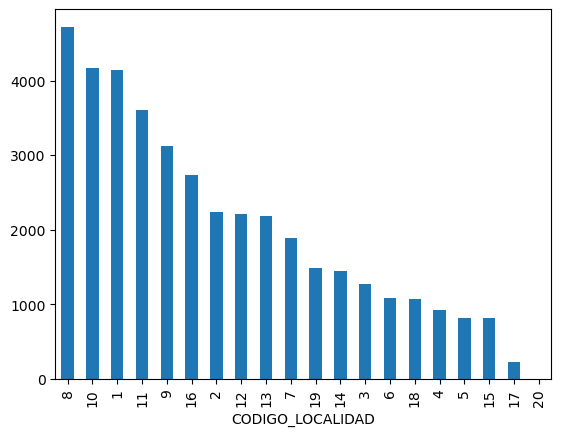

In [100]:
df_2017["CODIGO_LOCALIDAD"].value_counts(normalize=0).plot(kind="bar")

<Axes: xlabel='CODIGO_LOCALIDAD'>

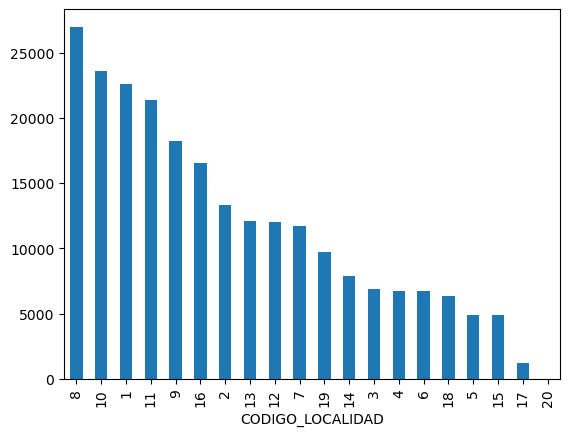

In [101]:
merged_inner["CODIGO_LOCALIDAD"].value_counts(normalize=0).plot(kind="bar")

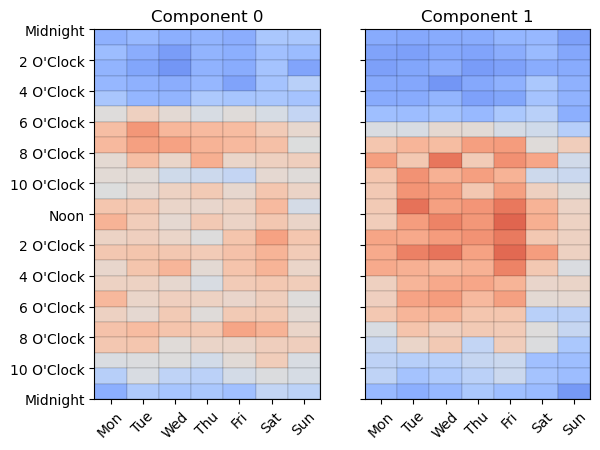

In [12]:
import warnings
warnings.filterwarnings("ignore")
df_location = df_2017.cal.aggregate_events("CODIGO_LOCALIDAD", "datetime")

model = lc.LatentCalendar(n_components=2, n_jobs=-1)

df_model = df_location.loc[df_location.sum(axis=1) > 0]
model.fit(df_model)

lc.plot.plot_model_components(model)

<Axes: xlabel='datetime'>

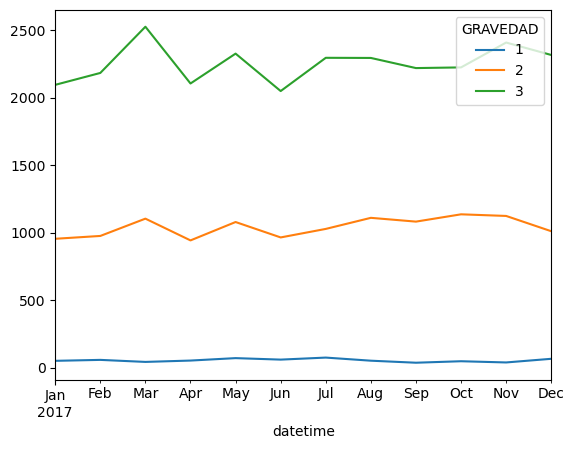

In [13]:
(
    df_2017
    .groupby([pd.Grouper(key="datetime", freq="M"), "GRAVEDAD"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)

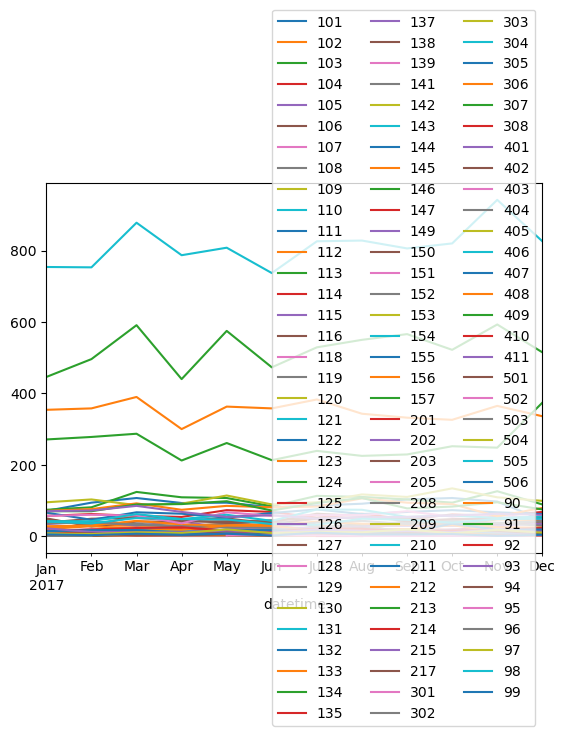

In [30]:
(
    df_2017
    .groupby([pd.Grouper(key="datetime", freq="M"), "CODIGO_CAUSA"])
    .size()top_5_categories = df_2017['CODIGO_CAUSA'].value_counts().index[:5]

    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot(kind="line",legend=0, stacked=0)
)
plt.legend(loc="right",ncols=3)


In [38]:
def plot_top_5_causes(df):
    top_5_categories = df['CODIGO_CAUSA'].value_counts().index[:5]
    df_filtered = df[df['CODIGO_CAUSA'].isin(top_5_categories)]
    df_filtered.groupby([pd.Grouper(key="datetime", freq="M"), "CODIGO_CAUSA"]).size().unstack().plot(kind="line",legend=0, stacked=0)
    plt.legend(loc="upper right")


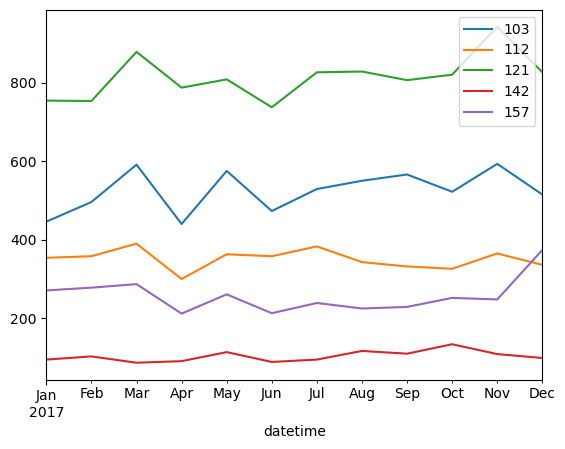

In [39]:
plot_top_5_causes(df_2017)

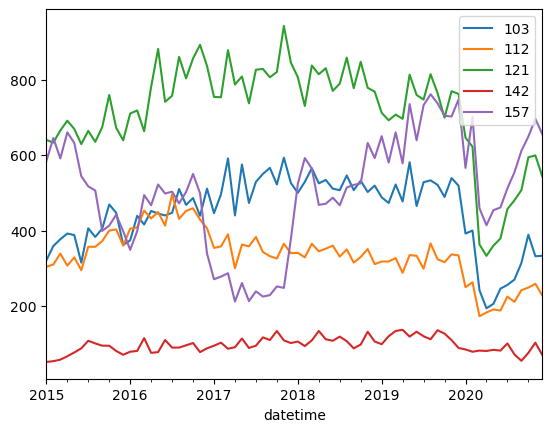

In [40]:
plot_top_5_causes(merged_inner)

In [47]:
actor_vial_df["datetime"] = pd.to_datetime(actor_vial_df["FECHA"].str.cat(actor_vial_df["HORA"], sep=" "), format="mixed")

In [46]:
actor_vial_df


,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,4401447,2452576,01/01/2015,CONDUCTOR,ILESO,44,FEMENINO,4401447-1
1,4401447,2452577,01/01/2015,CONDUCTOR,ILESO,31,MASCULINO,4401447-2
2,4401453,2452586,01/01/2015,CONDUCTOR,ILESO,47,MASCULINO,4401453-1
3,4401453,2452587,01/01/2015,CONDUCTOR,ILESO,29,MASCULINO,4401453-2
4,4401423,2452500,01/01/2015,CONDUCTOR,HERIDO,44,MASCULINO,4401423-1
...,...,...,...,...,...,...,...,...
422411,10530492,12728799,31/12/2020,CONDUCTOR,ILESO,27,MASCULINO,10530492-2
422412,10530494,12728800,31/12/2020,CONDUCTOR,ILESO,39,MASCULINO,10530494-1
422413,10530494,12728801,31/12/2020,CONDUCTOR,ILESO,55,MASCULINO,10530494-2
422414,10530493,12728802,31/12/2020,CONDUCTOR,ILESO,55,MASCULINO,10530493-1


# Results city by year

In [61]:
common_keys = ['CODIGO_ACCIDENTE',"FECHA"]
siniestro_actor_vial = pd.merge(left=siniestros_df, right=actor_vial_df, left_on=common_keys, right_on=common_keys)
siniestro_actor_vial["datetime"] = pd.to_datetime(siniestro_actor_vial["FECHA"].str.cat(siniestro_actor_vial["HORA"], sep=" "), format="mixed")


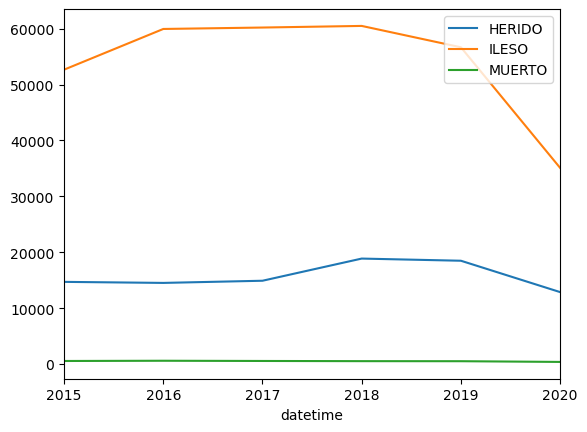

In [84]:
(
    siniestro_actor_vial
    .groupby([pd.Grouper(key="datetime", freq="Y"), "ESTADO"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)
plt.legend(loc="upper right")

In [77]:
siniestro_actor_vial["ESTADO"].value_counts()


ESTADO
ILESO     325025
HERIDO     94317
MUERTO      3074
Name: count, dtype: int64

In [100]:
siniestro_actor_vial_2018 = siniestro_actor_vial.loc[siniestro_actor_vial["datetime"].between("2018-01-01","2019-01-01")]

In [101]:
len(siniestro_actor_vial_2018)

79864

# 2018 Road Users by Locality

In [3]:
siniestro_actor_vial_2018["CODIGO_LOCALIDAD"].value_counts(normalize=0).plot(kind="bar")

NameError: name 'siniestros_2019' is not defined

In [125]:
siniestro_actor_vial_2018_localidad_8 = siniestro_actor_vial_2018.loc[siniestro_actor_vial_2018['CODIGO_LOCALIDAD'] == 8]
siniestro_actor_vial_2018_localidad_8


,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO,datetime
218600,4504609,01/01/2018,10:35:00,3,1,1.0,NaN,CL 39-KR 72 S 02,8,1,2673754,CONDUCTOR,ILESO,44,MASCULINO,4504609-1,2018-01-01 10:35:00
218601,4504609,01/01/2018,10:35:00,3,1,1.0,NaN,CL 39-KR 72 S 02,8,1,2673755,CONDUCTOR,ILESO,53,MASCULINO,4504609-2,2018-01-01 10:35:00
218602,4515984,01/01/2018,10:45:00,2,1,1.0,NaN,KR 86-CL 6D 2,8,1,2698354,MOTOCICLISTA,ILESO,28,MASCULINO,4515984-1,2018-01-01 10:45:00
218603,4515984,01/01/2018,10:45:00,2,1,1.0,NaN,KR 86-CL 6D 2,8,1,2698355,MOTOCICLISTA,HERIDO,21,FEMENINO,4515984-2,2018-01-01 10:45:00
218611,4504741,01/01/2018,11:20:00,3,1,1.0,NaN,KR 72-CL 37 S 02,8,1,2674045,CONDUCTOR,ILESO,46,MASCULINO,4504741-1,2018-01-01 11:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298409,10471833,31/12/2018,17:30:00,3,1,1.0,NaN,AV AVENIDA CIUDAD DE CALI-CL 13C 59,8,1,12603859,CONDUCTOR,ILESO,44,MASCULINO,10471833-2,2018-12-31 17:30:00
298410,10471848,31/12/2018,18:44:00,3,1,1.0,NaN,KR 80-CL 46 S 2,8,1,12603886,CONDUCTOR,ILESO,21,MASCULINO,10471848-1,2018-12-31 18:44:00
298411,10471848,31/12/2018,18:44:00,3,1,1.0,NaN,KR 80-CL 46 S 2,8,1,12603887,CONDUCTOR,ILESO,33,MASCULINO,10471848-2,2018-12-31 18:44:00
298412,10471839,31/12/2018,18:45:00,3,1,1.0,NaN,CL 1A-KR 72G S 2,8,1,12603871,CONDUCTOR,ILESO,33,MASCULINO,10471839-1,2018-12-31 18:45:00


In [4]:
estados = ["MUERTO","HERIDO","ILESO"]
for estado in estados:
    df_location = siniestro_actor_vial_2018_localidad_8.loc[siniestro_actor_vial_2018_localidad_8['ESTADO'] == estado].cal.aggregate_events("ESTADO", "datetime")

    model = lc.LatentCalendar(n_components=1, n_jobs=-1,)

    df_model = df_location.loc[df_location.sum(axis=1) > 0]
    model.fit(df_model)

    lc.plot.plot_model_components(model)
    plt.title(estado)
    

NameError: name 'siniestro_actor_vial_2018_localidad_8' is not defined

In [137]:
siniestro_actor_vial_2018_localidad_8.ESTADO.value_counts()

ESTADO
ILESO     6321
HERIDO    2412
MUERTO      61
Name: count, dtype: int64

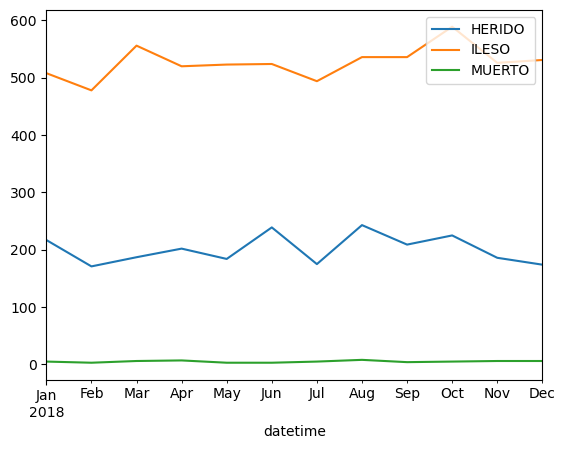

In [138]:
(
    siniestro_actor_vial_2018_localidad_8
    .groupby([pd.Grouper(key="datetime", freq="M"), "ESTADO"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)
plt.legend(loc="upper right")

In [201]:
# siniestro_actor_vial_2018_localidad_8["DIRECCION"].value_counts()
def clean_direccion(data):
     return " ".join(data.split()[:-1])
siniestro_actor_vial_2018_localidad_8['addr'] = siniestro_actor_vial_2018_localidad_8['DIRECCION'].apply(clean_direccion)
# list([ addr for addr in siniestro_actor_vial_2018_localidad_8["addr"].value_counts()[0:5]])
(siniestro_actor_vial_2018_localidad_8["addr"].value_counts()[0:5])


addr
KR 80-CL 2                 134
AV AVENIDA BOYACA-CL 12     92
AV AVENIDA BOYACA-CL 8      73
AV AVENIDA BOYACA-CL 6      72
AV AVENIDA BOYACA-CL 9      72
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 most common accident cites')

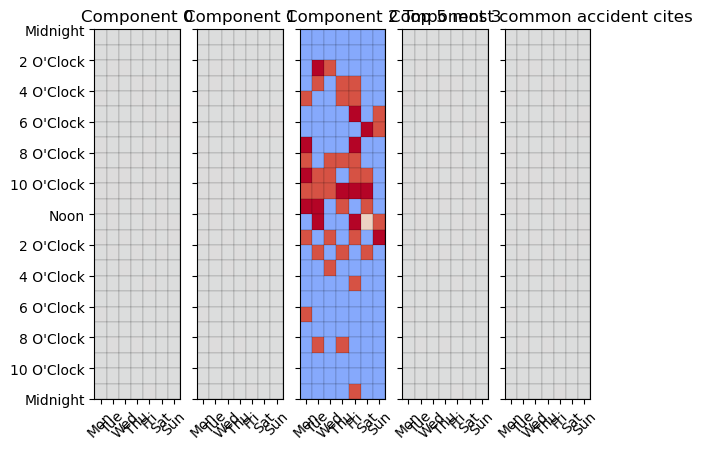

In [165]:
# df_location = siniestro_actor_vial_2018_localidad_8.cal.aggregate_events("addr", "datetime")
df_location = siniestro_actor_vial_2018_localidad_8.loc[siniestro_actor_vial_2018_localidad_8['addr'] == "KR 80-CL 2"].cal.aggregate_events("ESTADO", "datetime")

model = lc.LatentCalendar(n_components=5, n_jobs=-1,)

df_model = df_location.loc[df_location.sum(axis=1) > 0]
model.fit(df_model)

lc.plot.plot_model_components(model)
plt.title("Top 5 most common accident cites")

In [167]:
def latent_by_feature(df ,values: list ,feature_name: str) :

    for v in values:
        df_location = df.loc[df[feature_name] == v].cal.aggregate_events(feature_name, "datetime")
        model = lc.LatentCalendar(n_components=1, n_jobs=-1,)
        df_model = df_location.loc[df_location.sum(axis=1) > 0]
        model.fit(df_model)
        lc.plot.plot_model_components(model)
        plt.title(v)


# localidad 8 top 5 addresses

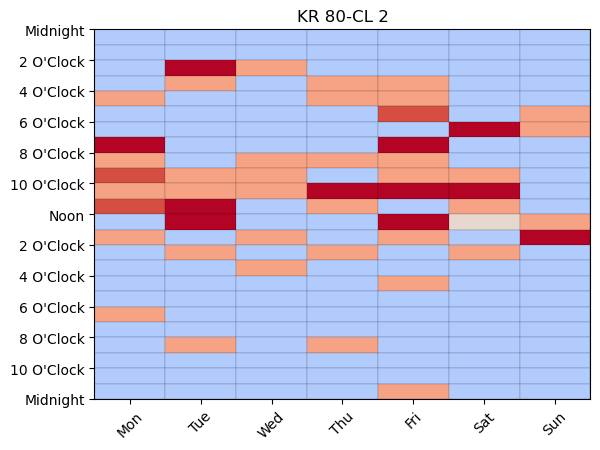

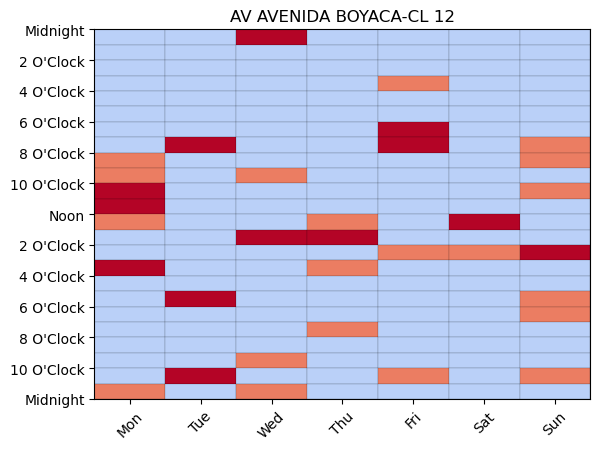

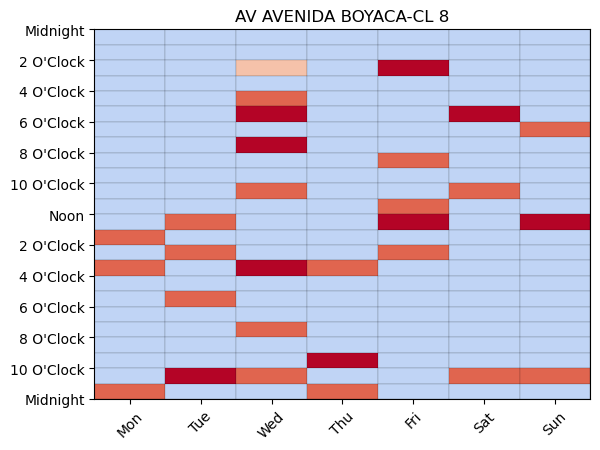

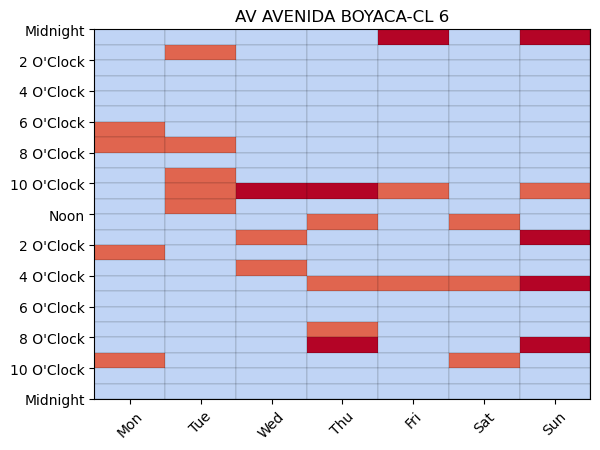

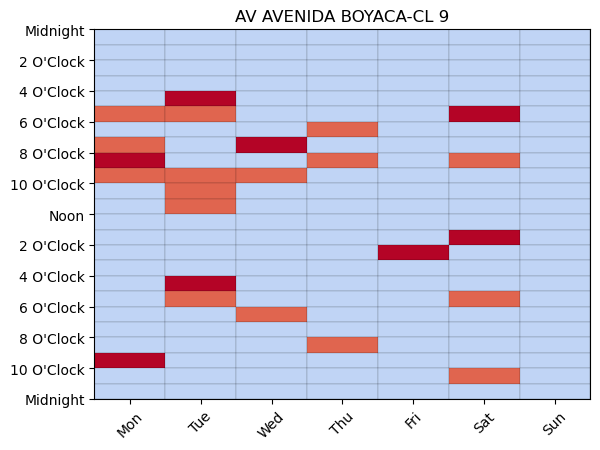

In [203]:
vs = [ 
    "KR 80-CL 2",
    "AV AVENIDA BOYACA-CL 12",
    "AV AVENIDA BOYACA-CL 8"  ,
    "AV AVENIDA BOYACA-CL 6",
    "AV AVENIDA BOYACA-CL 9"  ]
latent_by_feature(siniestro_actor_vial_2018_localidad_8,vs, "addr")

In [208]:
# siniestro_actor_vial['addr'] = siniestro_actor_vial['DIRECCION'].apply(clean_direccion)
# siniestro_actor_vial

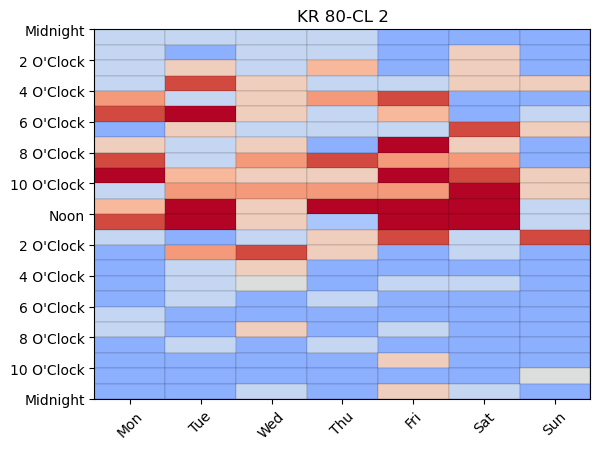

In [206]:
vs = [ "KR 80-CL 2"]
latent_by_feature(siniestro_actor_vial,vs, "addr")

In [216]:
av_df_2016 = siniestro_actor_vial.loc[siniestro_actor_vial["datetime"].between("2016-01-01","2017-01-01")]
av_df_2017 = siniestro_actor_vial.loc[siniestro_actor_vial["datetime"].between("2017-01-01","2018-01-01")]
av_df_2018 = siniestro_actor_vial.loc[siniestro_actor_vial["datetime"].between("2018-01-01","2019-01-01")]
av_df_2019 = siniestro_actor_vial.loc[siniestro_actor_vial["datetime"].between("2019-01-01","2020-01-01")]
av_df_2020 = siniestro_actor_vial.loc[siniestro_actor_vial["datetime"].between("2020-01-01","2021-01-01")]

dfs= [[av_df_2016,2016] , [av_df_2017,2017] , [av_df_2018,2018] , [av_df_2019,2019] , [av_df_2020,2020]]


# Top location over the years

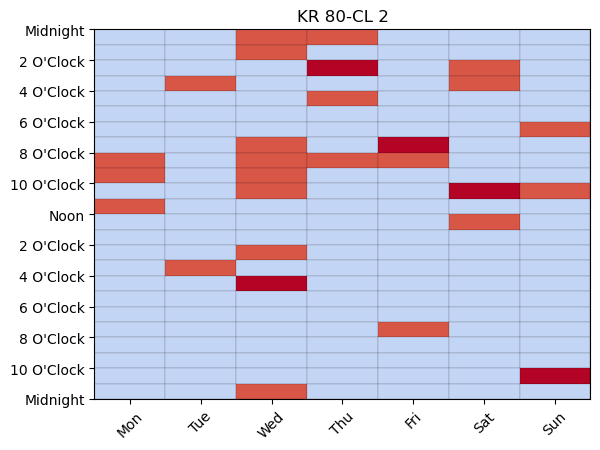

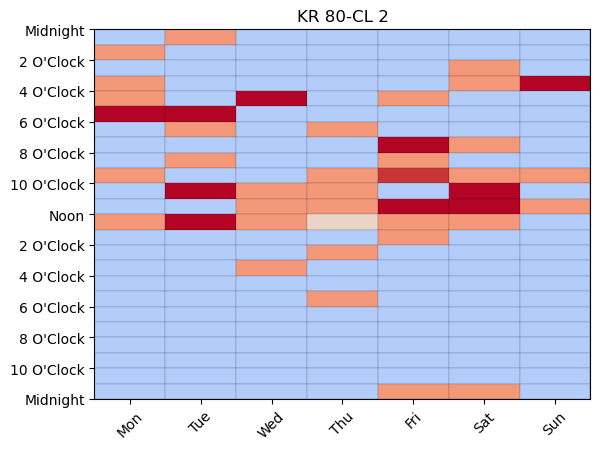

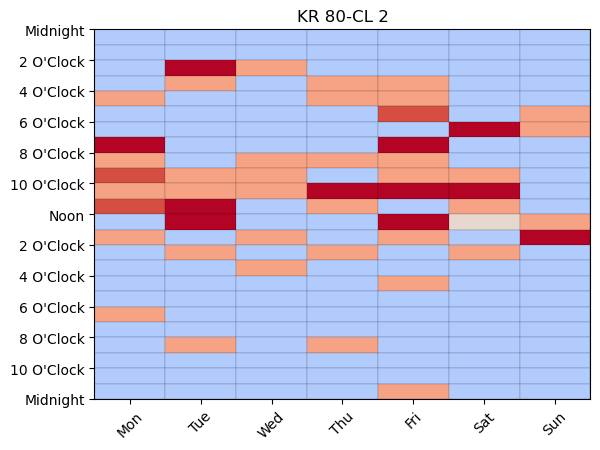

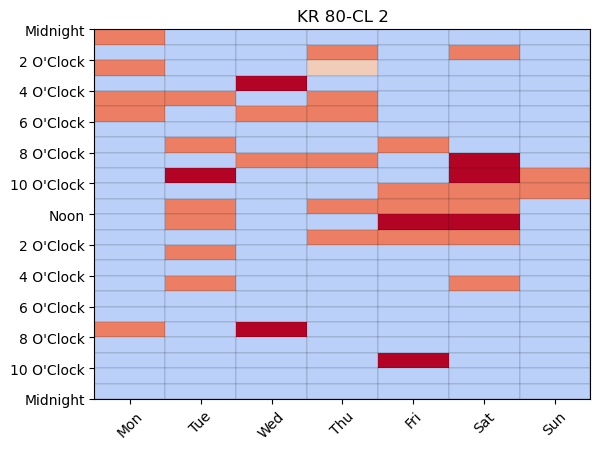

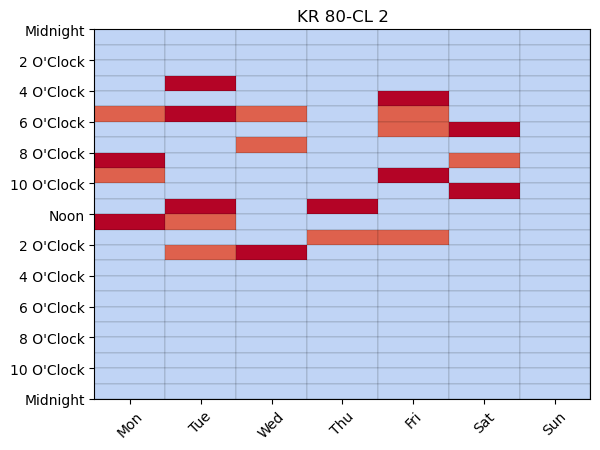

In [218]:
for df in dfs:
    vs = [ "KR 80-CL 2"]
#     print(f"YEAR: {df[1]}")
    latent_by_feature(df[0],vs, "addr")

In [221]:
"AV AVENIDA BOYACA-CL 1".split("-")[0]

'AV AVENIDA BOYACA'

In [222]:
def f(data):
    return data.split("-")[0]
siniestro_actor_vial_2018['avenida'] = siniestro_actor_vial['DIRECCION'].apply(f)

In [225]:
siniestro_actor_vial_2018.avenida.value_counts()

avenida
AV AVENIDA BOYACA            4698
KR 30                        2205
AV AVENIDA CIUDAD DE CALI    2047
KR 7                         2008
KR 45                        1984
                             ... 
CL 40G                          1
KR 33H                          1
KR 80GBIS                       1
CL 46GBIS                       1
KR 87H                          1
Name: count, Length: 2216, dtype: int64

# Street with highest incidents

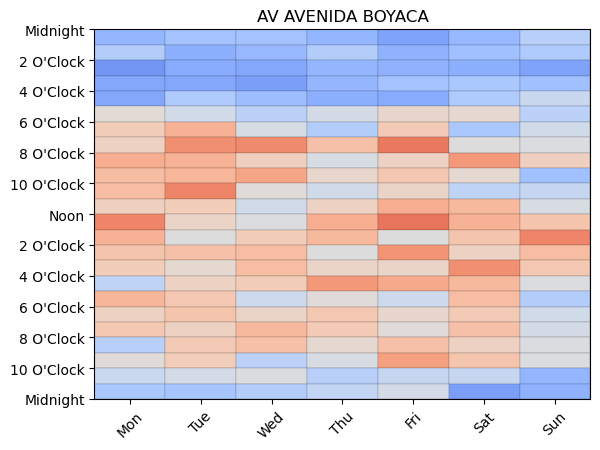

In [228]:
latent_by_feature(siniestro_actor_vial_2018,["AV AVENIDA BOYACA"], "avenida")

In [230]:
siniestro_actor_vial_2018.query("avenida == 'AV AVENIDA BOYACA'")["CODIGO_LOCALIDAD"].value_counts()

CODIGO_LOCALIDAD
8     1320
11     845
10     760
19     578
9      575
6      442
5      160
1        6
12       2
7        2
4        2
18       2
3        2
16       2
Name: count, dtype: int64

In [231]:
siniestro_actor_vial_2018.CODIGO_LOCALIDAD.value_counts()

CODIGO_LOCALIDAD
8     8794
10    8418
1     8083
11    6844
9     6329
16    5404
12    4535
2     4523
13    4362
7     4264
19    3004
14    2808
3     2436
4     2271
6     2153
18    1856
15    1831
5     1654
17     291
20       4
Name: count, dtype: int64

In [254]:
siniestro_actor_vial_2018.query("avenida == 'AV AVENIDA BOYACA'and CODIGO_LOCALIDAD == 1")

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO,datetime,avenida
240544,4514699,15/04/2018,00:45:00,2,1,1.0,NaN,AV AVENIDA BOYACA-KR 24 24,1,1,2695542,MOTOCICLISTA,ILESO,32,MASCULINO,4514699-1,2018-04-15 00:45:00,AV AVENIDA BOYACA
240545,4514699,15/04/2018,00:45:00,2,1,1.0,NaN,AV AVENIDA BOYACA-KR 24 24,1,1,2695543,CICLISTA,HERIDO,48,MASCULINO,4514699-2,2018-04-15 00:45:00,AV AVENIDA BOYACA
252486,10450572,06/06/2018,12:00:00,3,4,NaN,NaN,AV AVENIDA BOYACA-CL 53A 47,1,2,12558201,CONDUCTOR,ILESO,28,MASCULINO,10450572-1,2018-06-06 12:00:00,AV AVENIDA BOYACA
252487,10450572,06/06/2018,12:00:00,3,4,NaN,NaN,AV AVENIDA BOYACA-CL 53A 47,1,2,12558202,CONDUCTOR,ILESO,38,MASCULINO,10450572-2,2018-06-06 12:00:00,AV AVENIDA BOYACA
279685,10463230,08/10/2018,11:25:00,2,1,1.0,NaN,AV AVENIDA BOYACA-CL 182 2,1,1,12585496,CONDUCTOR,ILESO,63,MASCULINO,10463230-1,2018-08-10 11:25:00,AV AVENIDA BOYACA
279686,10463230,08/10/2018,11:25:00,2,1,1.0,NaN,AV AVENIDA BOYACA-CL 182 2,1,1,12585497,MOTOCICLISTA,HERIDO,32,MASCULINO,10463230-2,2018-08-10 11:25:00,AV AVENIDA BOYACA


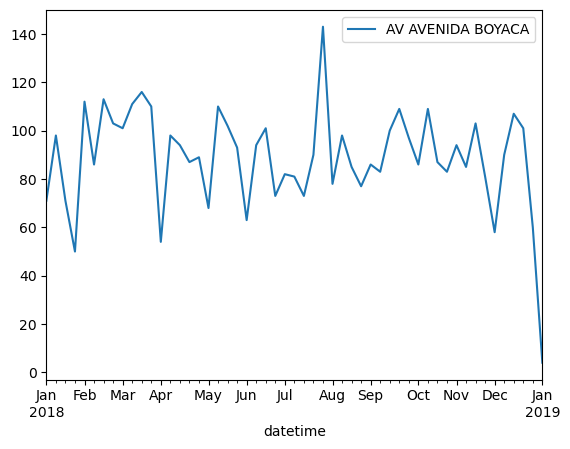

In [245]:
(
    siniestro_actor_vial_2018.query("avenida == 'AV AVENIDA BOYACA'")
    .groupby([pd.Grouper(key="datetime", freq="W"), "avenida"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)
plt.legend(loc="upper right")

In [247]:
def f(data):
    return data.split("-")[0]
siniestro_actor_vial['avenida'] = siniestro_actor_vial['DIRECCION'].apply(f)

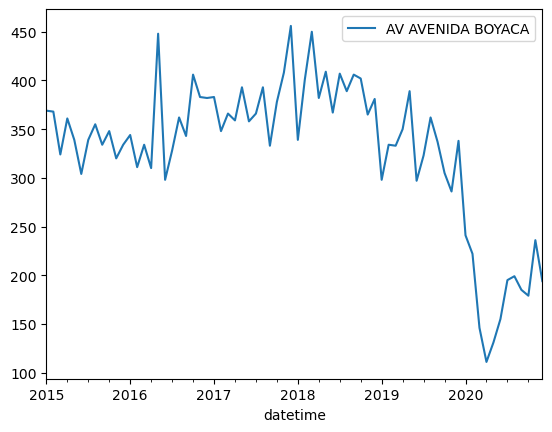

In [249]:
(
    siniestro_actor_vial.query("avenida == 'AV AVENIDA BOYACA'")
    .groupby([pd.Grouper(key="datetime", freq="m"), "avenida"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)
plt.legend(loc="upper right")

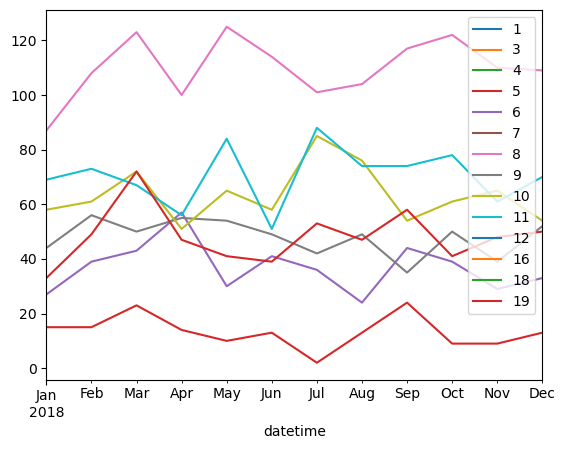

In [251]:
(
    siniestro_actor_vial_2018.query("avenida == 'AV AVENIDA BOYACA'")
    .groupby([pd.Grouper(key="datetime", freq="M"), "CODIGO_LOCALIDAD"])
    .size()
    .unstack()
#     .iloc[-52 * 2:]
#     .assign(ratio=lambda df: 0)
#     .loc[:, 1]
    .plot()
)
plt.legend(loc="upper right")

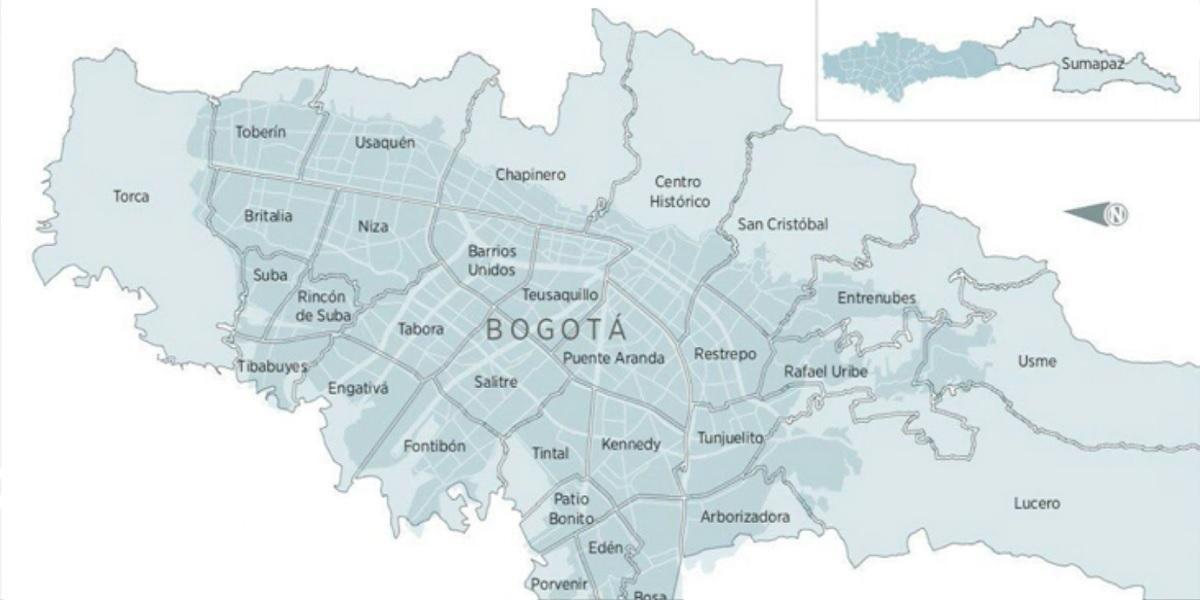

In [252]:
siniestro_actor_vial_2018.CODIGO_LOCALIDAD.value_counts() -siniestro_actor_vial_2018.query("avenida == 'AV AVENIDA BOYACA'")["CODIGO_LOCALIDAD"].value_counts()

CODIGO_LOCALIDAD
1     8077.0
2        NaN
3     2434.0
4     2269.0
5     1494.0
6     1711.0
7     4262.0
8     7474.0
9     5754.0
10    7658.0
11    5999.0
12    4533.0
13       NaN
14       NaN
15       NaN
16    5402.0
17       NaN
18    1854.0
19    2426.0
20       NaN
Name: count, dtype: float64

In [253]:
siniestro_actor_vial_2018.query("avenida == 'AV AVENIDA BOYACA'")["CODIGO_LOCALIDAD"].value_counts()

CODIGO_LOCALIDAD
8     1320
11     845
10     760
19     578
9      575
6      442
5      160
1        6
12       2
7        2
4        2
18       2
3        2
16       2
Name: count, dtype: int64